In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
name_col=df.columns.to_list()
name_col

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [12]:
name_col[-1].split("(")[0]

'Concrete compressive strength'

In [14]:
name_col=[i.split('(')[0] for i in name_col]
name_col

['Cement ',
 'Blast Furnace Slag ',
 'Fly Ash ',
 'Water  ',
 'Superplasticizer ',
 'Coarse Aggregate  ',
 'Fine Aggregate ',
 'Age ',
 'Concrete compressive strength']

In [15]:
df.columns=name_col
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [17]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [18]:
df.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [21]:
df[df.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [25]:
len(df[df.duplicated()])

25

In [26]:
df=df.drop_duplicates(keep='first')

In [27]:
len(df[df.duplicated()])

0

In [28]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [31]:
# we have gadbad with index
df=df.reset_index(drop=True)

In [32]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


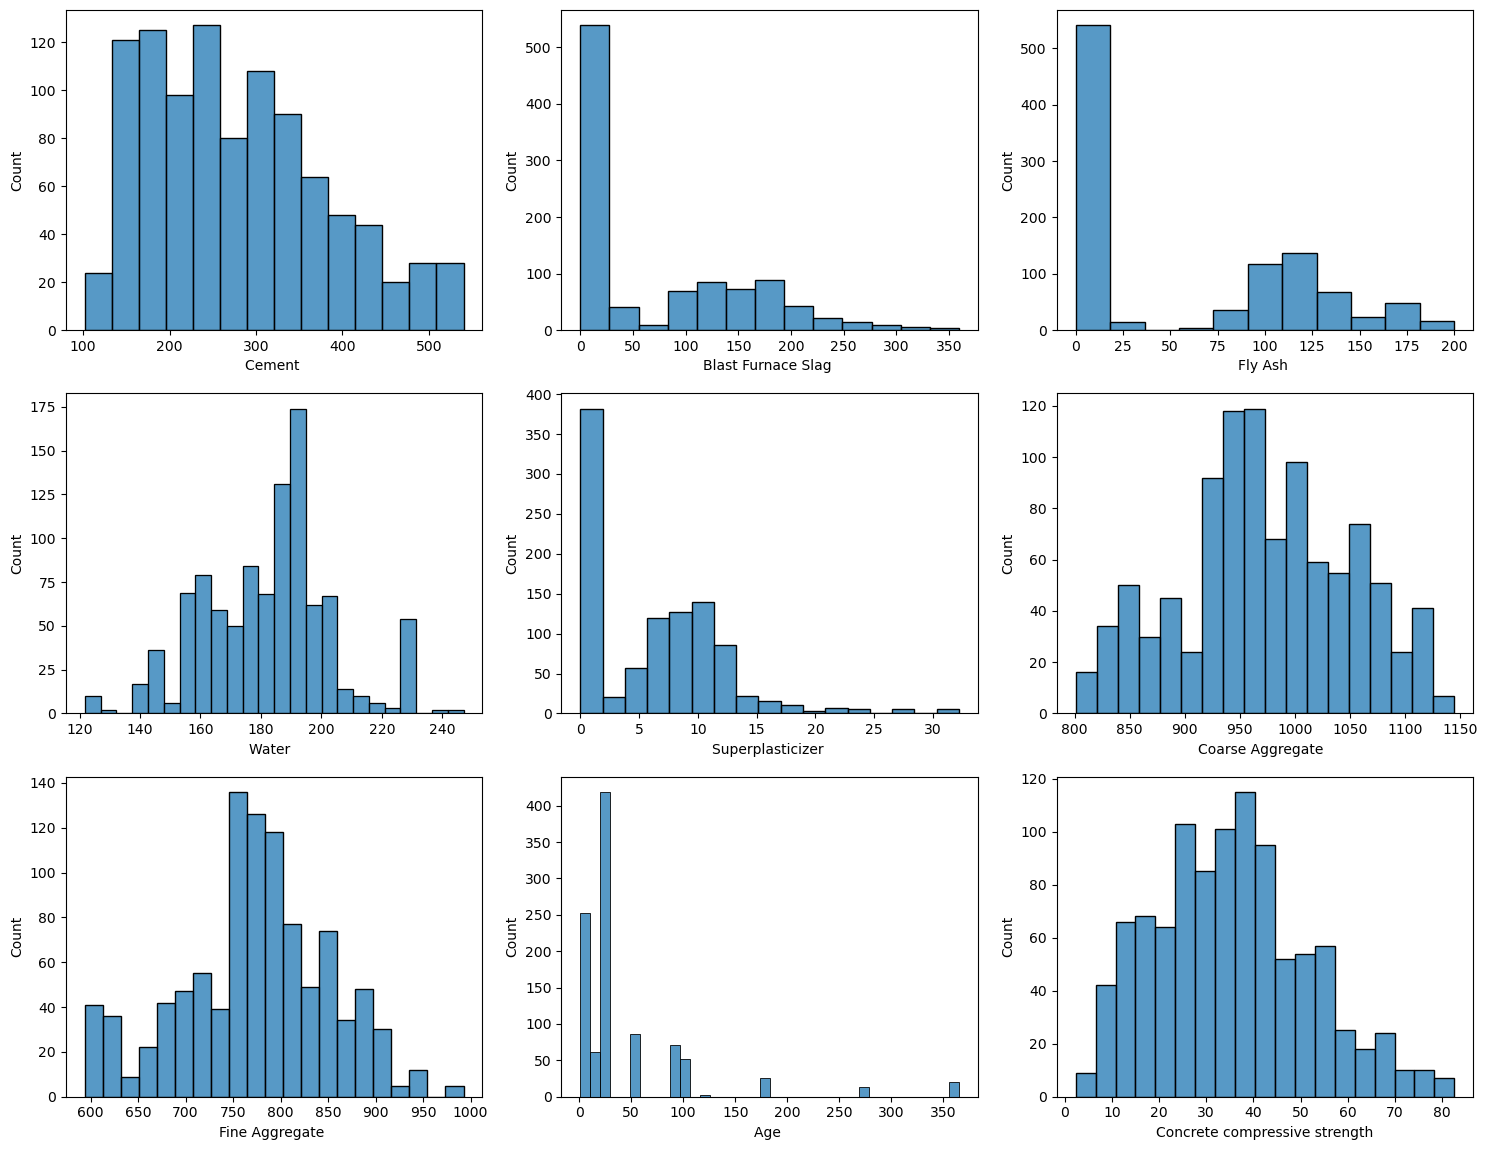

In [35]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

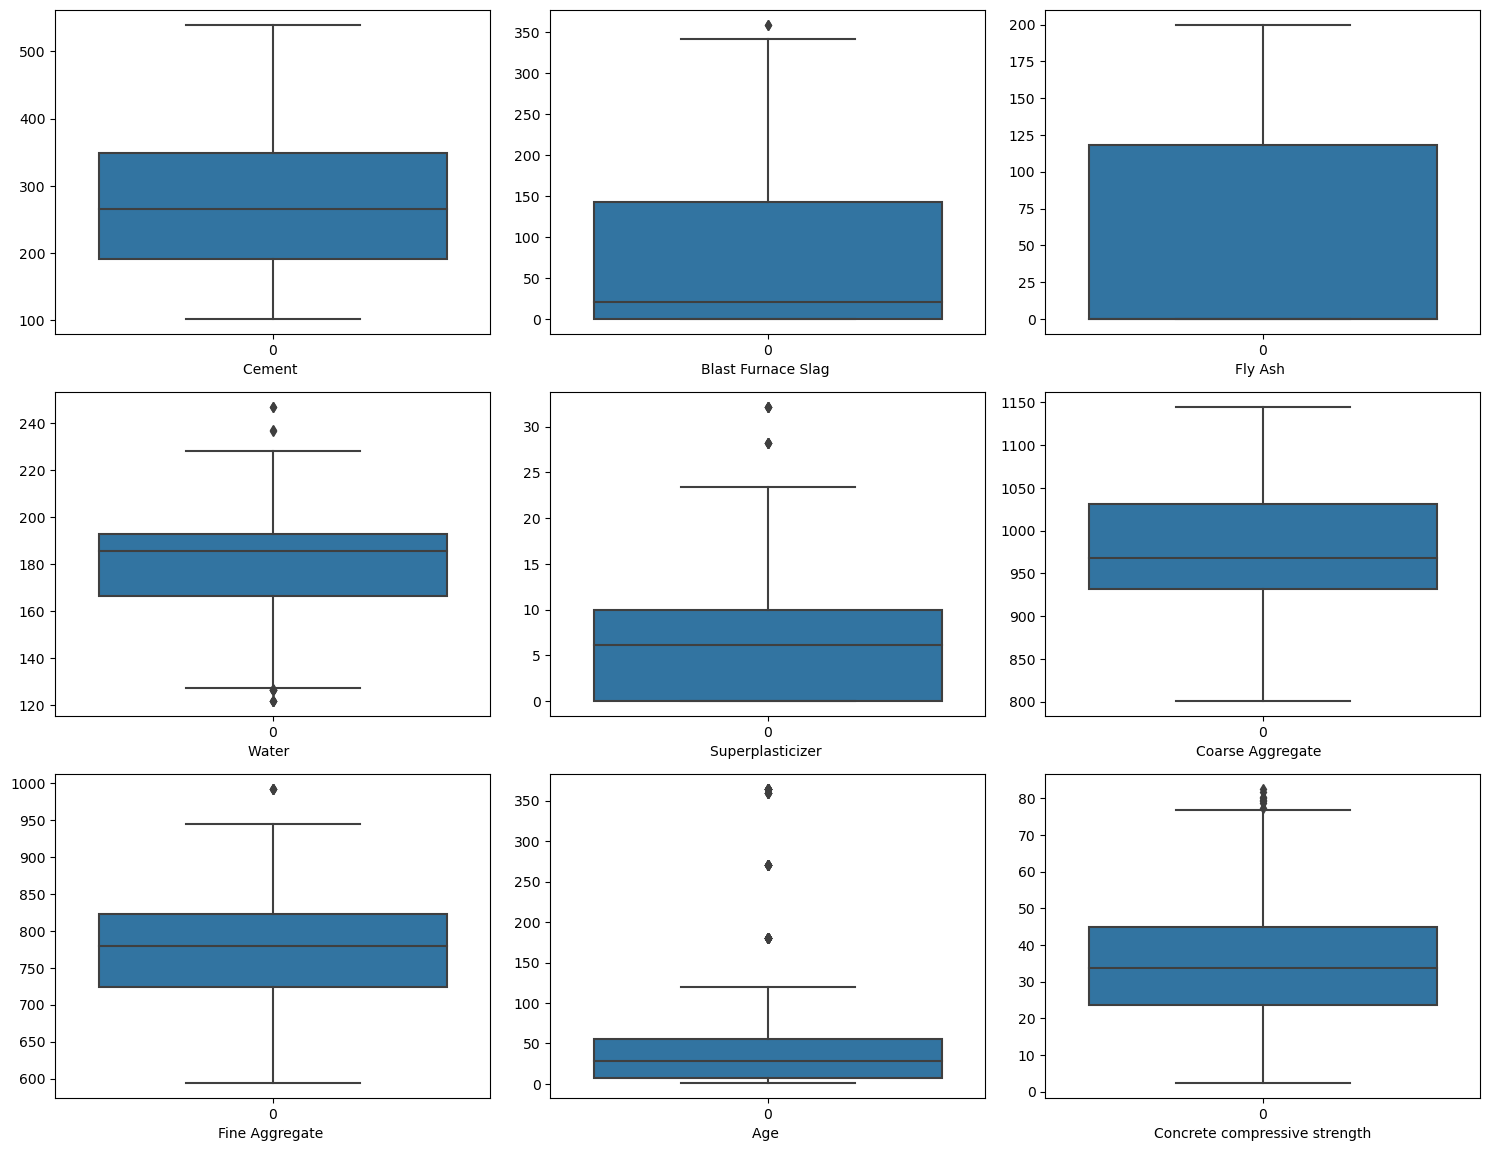

In [36]:
 plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [44]:
df.columns=df.columns.str.strip()

In [45]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [46]:
outliers=['Blast Furnace Slag','Water','Superplasticizer','Fine Aggregate','Age']

In [47]:
def outlier_capping(dataframe:pd.DataFrame,outliers:list):
    df=dataframe.copy()
    for i in outliers:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q3-1.5*iqr
        df.loc[df[i]>upper_limit,i]=upper_limit
        df.loc[df[i]<lower_limit,i]=lower_limit
    return df
df=outlier_capping(dataframe=df,outliers=outliers)

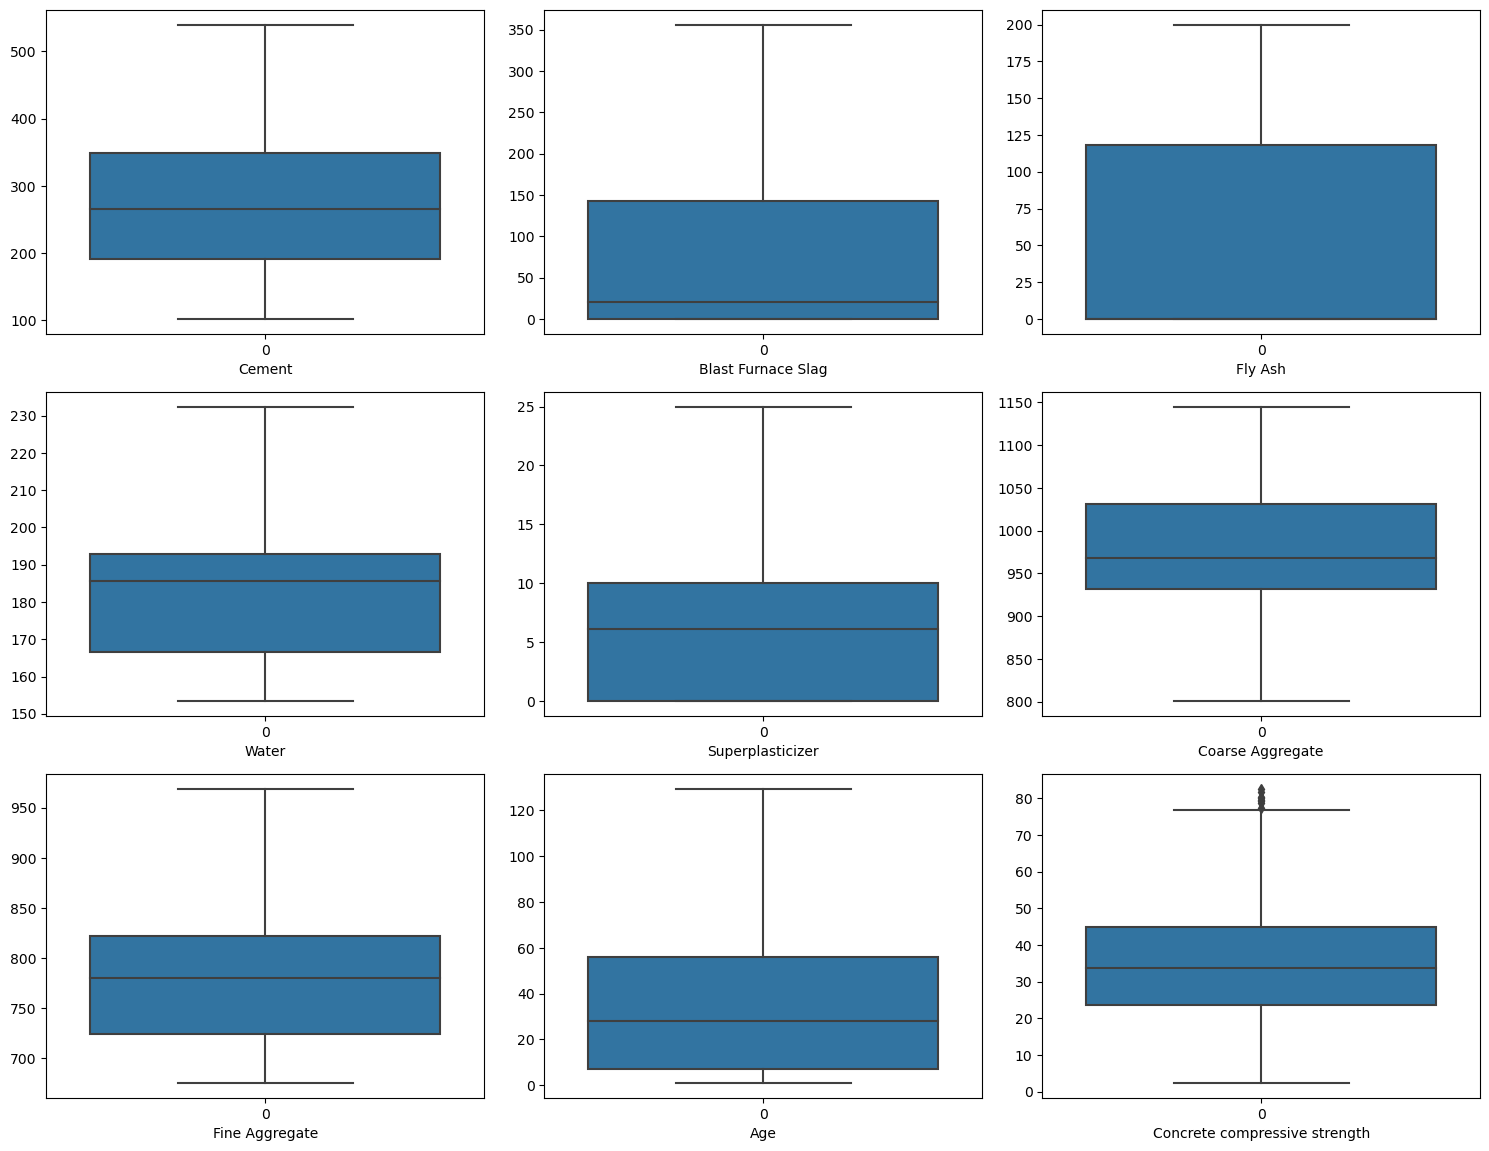

In [48]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [49]:
X=df.drop('Concrete compressive strength',axis=1)
y=df['Concrete compressive strength']

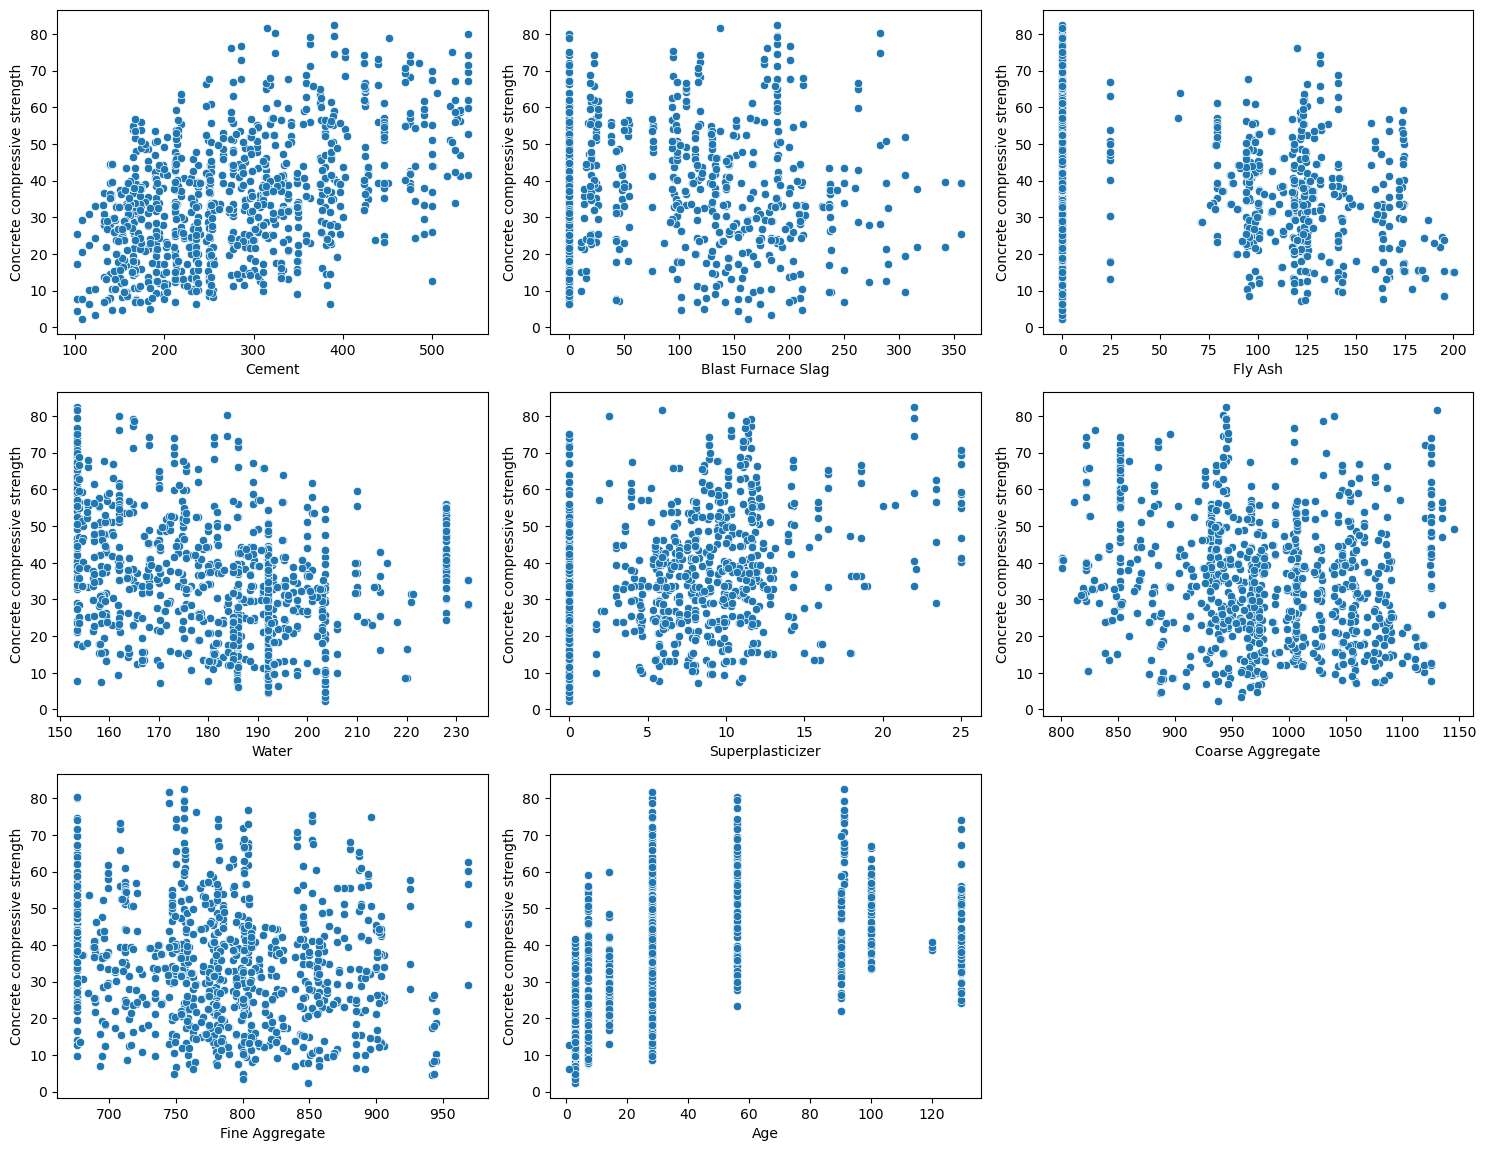

In [50]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in X.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.scatterplot(x=X[i],y=y)
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

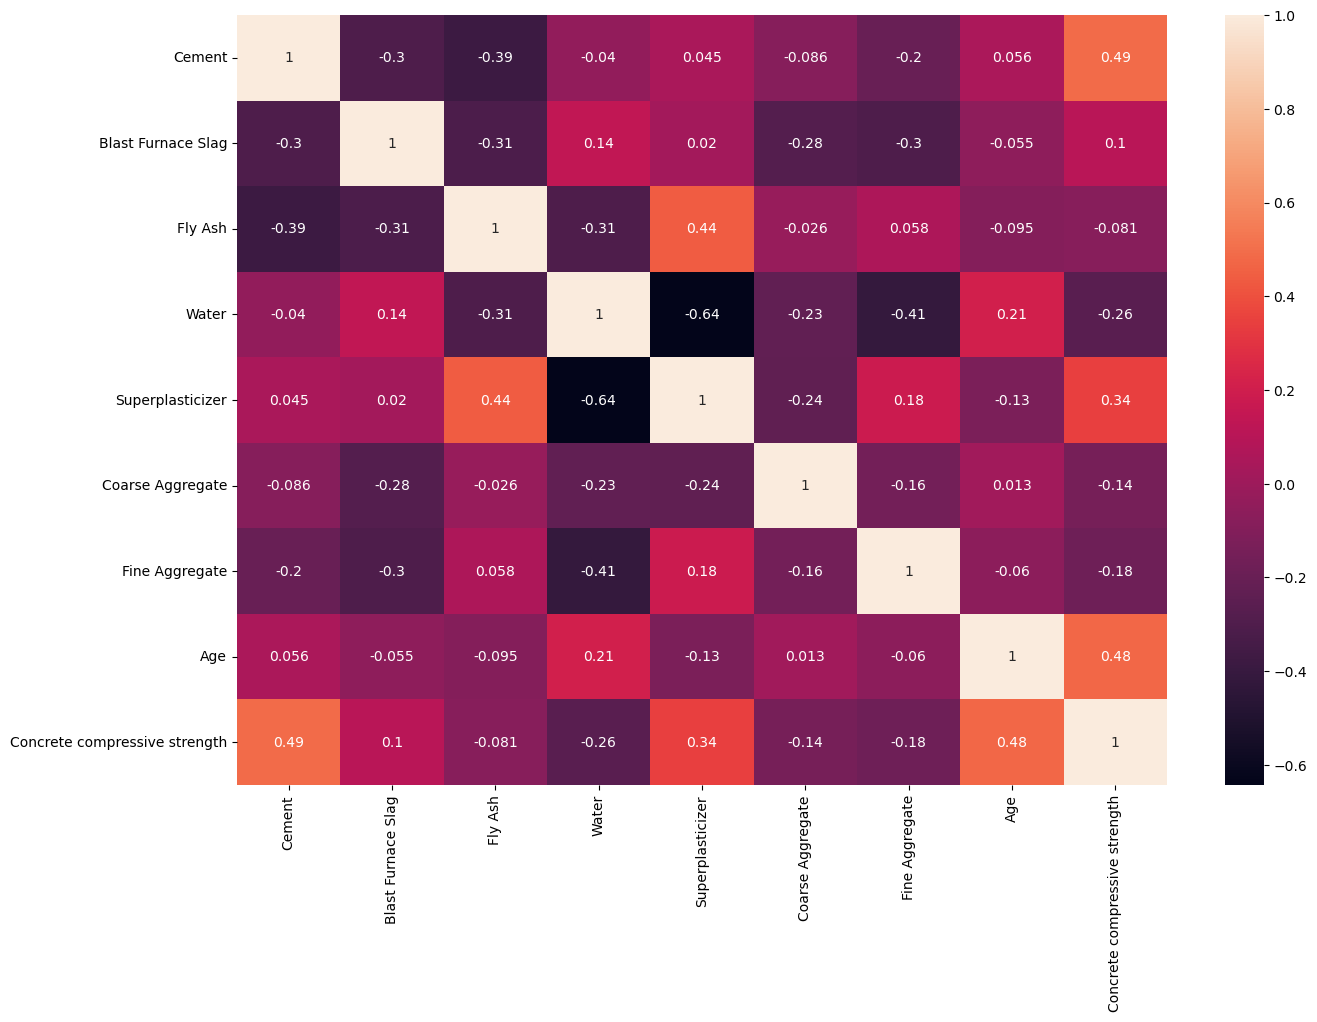

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score

In [68]:
def check_model_performance(preprocessor,xtrain,ytrain,xtest,ytest):
    models={'Linear Regression':LinearRegression(),
           'Ridge Regression':Ridge(alpha=1),
           'Lasso Regression':Lasso(alpha=1),
           'Random forest Regression':RandomForestRegressor(max_depth=5),
            'Gradient Boosting Regression':GradientBoostingRegressor(learning_rate=0.1)}
    for model_name,model in models.items():
        pipeline=make_pipeline(preprocessor,model)
        pipeline.fit(xtrain,ytrain)
        y_pred=pipeline.predict(xtest)
        mse=mean_squared_error(ytest,y_pred)
        r2=r2_score(ytest,y_pred)
        print(f'{model_name}-Mean Squared Error={mse:.2f} \n{model_name}-r2_score={r2:.2f}')
        

In [69]:
preprocessor1=make_pipeline(KNNImputer(n_neighbors=3),StandardScaler())
preprocessor2=make_pipeline(KNNImputer(n_neighbors=3),MinMaxScaler())
preprocessor3=make_pipeline(KNNImputer(n_neighbors=3),RobustScaler())

print(f"{'=' * 10} Result for standardScaler {'=' * 10}")
check_model_performance(preprocessor1,xtrain,ytrain,xtest,ytest)

print(f"{'=' * 10} Result for MinMaxScaler {'=' * 10}")
check_model_performance(preprocessor2,xtrain,ytrain,xtest,ytest)

print(f"{'=' * 10} Result for RobustScaler {'=' * 10}")
check_model_performance(preprocessor3,xtrain,ytrain,xtest,ytest)

========== Result for standardScaler ==========
Linear Regression-Mean Squared Error=77.48 
Linear Regression-r2_score=0.71
Ridge Regression-Mean Squared Error=77.41 
Ridge Regression-r2_score=0.71
Lasso Regression-Mean Squared Error=89.79 
Lasso Regression-r2_score=0.66
Random forest Regression-Mean Squared Error=49.54 
Random forest Regression-r2_score=0.81
Gradient Boosting Regression-Mean Squared Error=31.83 
Gradient Boosting Regression-r2_score=0.88
========== Result for MinMaxScaler ==========
Linear Regression-Mean Squared Error=77.48 
Linear Regression-r2_score=0.71
Ridge Regression-Mean Squared Error=76.97 
Ridge Regression-r2_score=0.71
Lasso Regression-Mean Squared Error=161.31 
Lasso Regression-r2_score=0.39
Random forest Regression-Mean Squared Error=47.96 
Random forest Regression-r2_score=0.82
Gradient Boosting Regression-Mean Squared Error=31.49 
Gradient Boosting Regression-r2_score=0.88
========== Result for RobustScaler ==========
Linear Regression-Mean Squared Erro

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,200],
           'learning_rate':[0.1,0.01],
           'max_depth':[5,3,7],
           'min_samples_split':[2,4],
           'min_samples_leaf':[1,2,3]}
grid=GridSearchCV(GradientBoostingRegressor(),param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [72]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [77]:
gbl=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf=3,min_samples_split=2,n_estimators=200)

In [76]:
grid.best_estimator_.score(xtest,ytest)

0.9201664369032978

In [78]:
gbl.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, n_estimators=200)

In [79]:
ypred=gbl.predict(xtest)

In [80]:
ypred

array([38.46791935, 26.56675582, 47.28340167, 70.99204471, 22.80820718,
       43.84472988, 53.11648092, 29.82218186, 35.63668201, 19.57107841,
       33.78993241, 28.19120786, 33.71347475, 45.41158157, 36.23877371,
       11.84998456, 31.49418691, 10.15641101, 36.12977639, 26.30596025,
       49.06943284, 59.33007579, 19.07689106, 43.05867271, 30.50072394,
       30.77874849, 35.30350977, 47.81034749, 34.95725407, 75.72209248,
       53.04617524, 20.65242824, 24.91508708, 29.96723038, 55.69244198,
       34.63992689, 35.87550336, 51.04703069, 27.45206353, 31.12639189,
       12.10823149, 35.18147809, 12.23489827, 32.21641292, 24.3700307 ,
       44.94894441, 53.53600543, 71.66880593, 36.83632865, 61.30848956,
       47.58743256, 13.59630023, 29.11518121, 39.00761697,  8.32058704,
       42.90546631, 33.14938115, 11.92348062, 40.27452021, 53.61625464,
       16.7367512 , 61.68250447, 64.44095385, 37.8724519 , 33.85920638,
       17.77765768, 39.52465784, 17.83607329, 28.32578635, 36.14

In [82]:
mean_squared_error(ytest,ypred)

21.05987317486512

In [84]:
r2_score(ytest,ypred)

0.9202365424139832